             Master Big Data & Business Intelligence
          Machine Learning Mini Projet By Laghroubi Mohamed


# Machine learning 

## Data Preprocessing

### Importing the libraries

In [98]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

### Importing the Dataset

In [99]:
housing = pd.read_csv('housing.csv')
housing.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY


### Visualise Data by longitude and latitude with population and house price



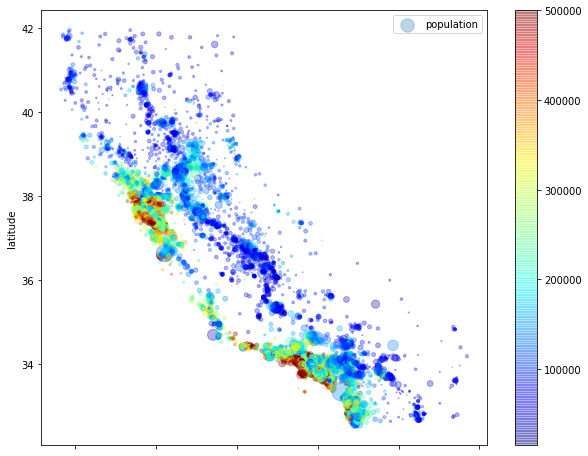

In [100]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.3,
         s=housing['population']/100, label='population',
         c=housing['median_house_value'],                      
         cmap=plt.get_cmap('jet'),      
         colorbar=True,
         figsize=(10,8))
plt.legend()

 ---

### Get info about our dataset

In [101]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


### Check how many ocean_proximity categorie we have

In [102]:
print(housing['ocean_proximity'].value_counts())

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64


### Taking care of missing data
> after we run the `houssing.info()` command we can clearly see that the `'total_bedrooms'` colomn has only `20433 values` and the others with `20640 values` wich mean that we have **`207 NA`** in 'total_bedrooms'

> we can check this by running **`houssing.isnull().sum()`**





In [103]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

> and because we have `207 NA` `it's not right to delete it` so we need to `replace` them 

> because we have `5 ocean_proximity category` its gonna be more accurate if we `replace the NA with the median of the categorie she's Belong to `

> to do that we can simply create a `method` with python to that for us instead of using the SimpleImputer from sklearn to change all the NA with whole dataset median

In [104]:
def calcCategoricalMedian(x):
    ocean_proximity=housing['ocean_proximity'].unique()
    for i in ocean_proximity:
        median=x[x['ocean_proximity']==i]['total_bedrooms'].median()
        x.loc[x['ocean_proximity']==i,'total_bedrooms'] =  x[x['ocean_proximity']==i]['total_bedrooms'].fillna(median)
calcCategoricalMedian(housing)
housing.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

### Encoding categorical data

> After make our data clean from NA lets first create our x and y


In [105]:
x=housing.drop('median_house_value',axis=1).values
y=housing['median_house_value'].values

In [106]:
from sklearn.preprocessing import  LabelEncoder, OneHotEncoder 
from sklearn.compose import ColumnTransformer
labelencoder = LabelEncoder()
x [:,8] = labelencoder.fit_transform(x[:,8])
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [8])], remainder='passthrough')
x = np.array(ct.fit_transform(x))

### Splitting the dataset into the Training set and Test set
> because we have `20640` value let's take the `test_size` as `25%` of the dataset

In [107]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 1)

### Feature Scaling

In [108]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train[:, 5:] = sc.fit_transform(x_train[:, 5:])
x_test[:, 5:] = sc.transform(x_test[:, 5:])

> Now our data is clean and ready to go so lets train our Machine Learning Models

---
## ***Note*** 
> From the article of `Dr. Michael J. Garbade` in [Medium](https://medium.com/quick-code/regression-versus-classification-machine-learning-whats-the-difference-345c56dd15f7#:~:text=The%20main%20difference%20between%20them,is%20categorical%20(or%20discrete).) we can say that our problem is a `Regression` problem because the label `'median_house_value'` is `continuous`

---


## Linear Regression

### Training the Linear Regression Model 

In [109]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [110]:
lr_prediction = lr.predict(x_test)
np.set_printoptions(precision=2)
print(np.concatenate((lr_prediction.reshape(len(lr_prediction),1), y_test.reshape(len(y_test),1)),1))

[[242560. 355000.]
 [ 92736.  70700.]
 [247616. 229400.]
 ...
 [ 94272.  58800.]
 [275392. 210800.]
 [126912.  87500.]]


###evaluating the Linear Regression Model

In [111]:
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error
linearr2 =r2_score(y_test,lr_prediction)
linearrmse = np.sqrt(mean_squared_error(y_test, lr_prediction))

## Polynomial Regression

### Training The Polynomial Model

In [112]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures()
X_poly = poly_reg.fit_transform(x_train)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Get polynomial model Prediction and Score

In [113]:
poly_prediction = lin_reg.predict(poly_reg.transform(x_test))
polyr2 = r2_score(y_test,poly_prediction)
polyrmse = np.sqrt(mean_squared_error(y_test, poly_prediction))


## Decision Tree Regression

### Training the Decision Tree Model 

In [114]:
from sklearn.tree import DecisionTreeRegressor
dtRegressor = DecisionTreeRegressor(random_state = 0)
dtRegressor.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

### Predicting the Test set Result and Get Score

In [115]:
dt_prediction = dtRegressor.predict(x_test)
print(np.concatenate((dt_prediction.reshape(len(dt_prediction),1), y_test.reshape(len(y_test),1)),1))
dtr2 = r2_score(y_test,dt_prediction)
dtrmse = np.sqrt(mean_squared_error(y_test, dt_prediction))


[[287500. 355000.]
 [ 58800.  70700.]
 [272500. 229400.]
 ...
 [ 61300.  58800.]
 [296700. 210800.]
 [137500.  87500.]]


## Random forest Regression 

### Before train our Model lets use the GridSearchCv to find the best paramters for our model

In [116]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
param_grid = {'n_estimators': [30, 50, 100],'max_features': [4, 6, 8]}
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,scoring='r2')
grid_search.fit(x_train, y_train)
print(grid_search.best_params_)

{'max_features': 8, 'n_estimators': 100}


### Traing the Random Forest Regression

In [117]:
rfRegressor = RandomForestRegressor(n_estimators = 100, random_state = 0,max_features=8)
rfRegressor.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=8, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

### Predicting Random Forest Test set Result and get Score

In [118]:
rf_prediction = rfRegressor.predict(x_test)
print(np.concatenate((rf_prediction.reshape(len(rf_prediction),1), y_test.reshape(len(y_test),1)),1))
rfr2 = r2_score(y_test,rf_prediction)
print(rfr2)
rfrmse = np.sqrt(mean_squared_error(y_test, rf_prediction))

[[349997.09 355000.  ]
 [ 65669.    70700.  ]
 [242682.02 229400.  ]
 ...
 [ 73275.    58800.  ]
 [230412.   210800.  ]
 [150816.    87500.  ]]
0.8186050669055616


## Support Vector Regression (SVR)

### Training the SVR model

In [119]:
from sklearn.svm import SVR
regressorsvr = SVR(kernel = 'rbf')
regressorsvr.fit(x_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

### Predict result and get the score

In [120]:
svr_prediction = regressorsvr.predict(x_test)
svrr2 =r2_score(y_test,svr_prediction)
svrrmse = np.sqrt(mean_squared_error(y_test, svr_prediction))


## Conclusion 

In [121]:
data= [['Linear Regressin', linearr2, linearrmse],['DecisionTreeRegressor',dtr2,dtrmse],['Polynomial Regression', polyr2,polyrmse],
       ['RandomForestRegressor', rfr2,rfrmse],['SVR',svrr2,svrrmse]]
df = pd.DataFrame(data , columns=['model','r2 Score','Root Mean Squared Error '])
df

,model,r2 Score,Root Mean Squared Error
0,Linear Regressin,0.632367,69557.642351
1,DecisionTreeRegressor,0.641023,68733.924708
2,Polynomial Regression,0.694843,63372.291525
3,RandomForestRegressor,0.818605,48859.642334
4,SVR,-0.035997,116766.170564


> We can see that by the use of `Random forest
regression` we are getting an `r2 Score of 81.8 %` 
Hence ' RANDOM FOREST ' could be `the best model because of low mean squared error ` with 48859.64. 